In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#dataset = "pr_school"
#dataset = "h_school11"
#dataset = "h_school13"
#dataset = "InVS15"
dataset = "hypertext"

In [5]:
def load_R_list(filename):
    R0_list_ = []
    Rinf_list_ = []
    file=open(filename, 'r')
    content =file.read().splitlines()
    for line in content:
        R0, Rinf = line.split(' ',2)
        R0_list_.append(float(R0))
        Rinf_list_.append(float(Rinf))
    file.close()
    return R0_list_, Rinf_list_

In [24]:
def plot_histograms(distr_D,distr_E,distr_ES,distr_EST,num_bin,measure,yscale):
    
    Min = min(min(distr_D),min(distr_E),min(distr_ES),min(distr_EST))
    Max = max(max(distr_D),max(distr_E),max(distr_ES),max(distr_EST))
    bin_lims = np.linspace(Min,Max,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])

    ##computing the histograms
    hist_D, _ = np.histogram(distr_D, bins=bin_lims,density=True)
    hist_E, _ = np.histogram(distr_E, bins=bin_lims,density=True)
    hist_ES, _ = np.histogram(distr_ES, bins=bin_lims,density=True)
    hist_EST, _ = np.histogram(distr_EST, bins=bin_lims,density=True)

    #fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(3.5,2))
    fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(3.05,2.5))
    plt.plot(bin_centers, hist_D,'o-',markersize=9, label='D',color=D_color)
    plt.plot(bin_centers, hist_E,'v-',markersize=5, label='E',color=E_color)
    plt.plot(bin_centers, hist_ES,'^-',markersize=5, label='ES',color=ES_color)
    plt.plot(bin_centers, hist_EST,'o-',markersize=5, label='EST',color=EST_color)
    if measure == 'R0':
        ax.set_xlabel('$R_0$',fontsize=11)  
    elif measure == 'Rinf':
        ax.set_xlabel('$R_{\infty}$',fontsize=11)  
    elif measure == 'Rinfstart':
        ax.set_xlabel('$R_{\infty}$',fontsize=11)  
    ax.set_xscale('linear')
    ax.set_yscale(yscale)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0,3,2,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='best')
    ax.set_title(r'$\beta=0.02, \mu=0.01$',fontsize=9)
    fig.tight_layout()
    
    if not os.path.exists('figs/'):
        os.makedirs('figs/')
    filename = 'figs/distr_'+measure+'_'+dataset+'.pdf'
    plt.savefig(filename)

    plt.show()

In [19]:
D_color = "#656565"
E_color = '#ffcc5c'
ES_color = '#88d8b0'
EST_color = '#ff6f69'

In [20]:
beta_range = np.logspace(-2,-1,num=10)
mu_range = np.logspace(-2,-1,num=10)

In [21]:
plt.rcParams.update({'font.size': 10})

In [22]:
#beta = 0.02
#mu = 0.01
beta = 0.06
mu = 0.01

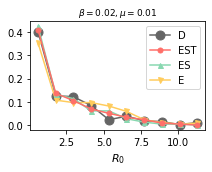

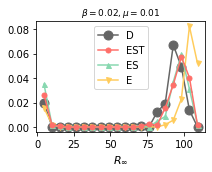

In [27]:
# D:
filename = "results/D_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
R0_D, Rinf_D = load_R_list(filename)
Rinf_start_D = [x for x in Rinf_D if x!=1] #Rinf only if larger than 1
# E:
filename = "results/E_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
R0_E, Rinf_E = load_R_list(filename)
Rinf_start_E = [x for x in Rinf_E if x!=1] #Rinf only if larger than 1
# ES:
filename = "results/ES_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
R0_ES, Rinf_ES = load_R_list(filename)
Rinf_start_ES = [x for x in Rinf_ES if x!=1] #Rinf only if larger than 1
# EST:
filename = "results/EST_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
R0_EST, Rinf_EST = load_R_list(filename)
Rinf_start_EST = [x for x in Rinf_EST if x!=1] #Rinf only if larger than 1

plot_histograms(R0_D,R0_E,R0_ES,R0_EST,10,'R0','linear')

plot_histograms(Rinf_start_D,Rinf_start_E,Rinf_start_ES,Rinf_start_EST,20,'Rinfstart','linear')
